In [93]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.neighbors import KNeighborsClassifier
from seaborn import heatmap
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV

In [3]:
digits=load_digits()

In [88]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=.3,random_state=42)

In [89]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9888888888888889

In [90]:
max_score=0
imax=0
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    x=knn.score(X_test,y_test)
    if x>max_score:
        max_score=x
        imax=i
print(f'{max_score = }  {imax = } ')

max_score = 0.9944444444444445  imax = 6 


In [55]:
clf=GridSearchCV(KNeighborsClassifier(),{'n_neighbors':[x for x in range(1,20)]},cv=10)
clf.fit(digits.data,digits.target)
pd.DataFrame({
    'model':'KNN',
    'best_score':clf.best_score_,
    'best_params': clf.best_params_
    })

,model,best_score,best_params
n_neighbors,KNN,0.976633,3


In [91]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9944444444444445

In [92]:
y_predicted=knn.predict(X_test)
cm=confusion_matrix(y_test,y_predicted)
cm

array([[53,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 47,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 54,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 66,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 53,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 55,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 43,  0],
       [ 0,  0,  0,  1,  1,  1,  0,  0,  0, 56]], dtype=int64)

Text(69.0, 0.5, 'truth')

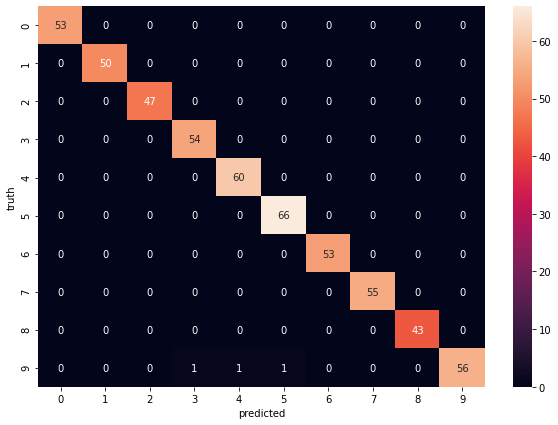

In [100]:
plt.figure(figsize=(10,7))
heatmap(cm,annot=True)
plt.xlabel('predicted')
plt.ylabel('truth')

In [102]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       0.98      1.00      0.99        54
           4       0.98      1.00      0.99        60
           5       0.99      1.00      0.99        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       1.00      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       1.00      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540

